In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
data = pd.read_csv("Uber Drives - .csv")
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [118]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [120]:
data.duplicated().sum()

1

In [121]:
data.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [122]:
data_copy = data.copy()

In [123]:
data.drop_duplicates(inplace=True)

In [124]:
data.fillna('NoData' , inplace=True)

In [125]:
data.iloc[[1154]]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NoData,NoData,NoData,NoData,12204.7,NoData


In [126]:
data.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NoData,NoData,NoData,NoData,12204.7,NoData


In [127]:
data.drop([1155] , axis=0 , inplace=True)

In [128]:
data['START_DATE*'].sample(15)

4         1/6/2016 14:42
1127    12/28/2016 13:53
10       1/10/2016 15:08
127       2/19/2016 9:21
935     11/10/2016 19:18
726      8/27/2016 14:01
851     10/24/2016 14:57
603      7/27/2016 19:08
1123    12/27/2016 16:34
608      7/29/2016 17:27
335      4/28/2016 13:30
353       5/4/2016 21:30
120      2/17/2016 16:38
392       6/1/2016 10:19
1079     12/21/2016 7:42
Name: START_DATE*, dtype: object

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1154 non-null   object 
 1   END_DATE*    1154 non-null   object 
 2   CATEGORY*    1154 non-null   object 
 3   START*       1154 non-null   object 
 4   STOP*        1154 non-null   object 
 5   MILES*       1154 non-null   float64
 6   PURPOSE*     1154 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.1+ KB


In [130]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'])
data['END_DATE*'] =   pd.to_datetime(data['END_DATE*'] )

In [131]:
data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NoData
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


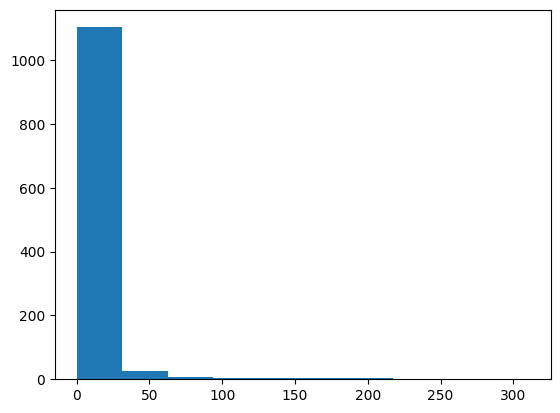

In [132]:
## Check how long do people travel with Uber?
plt.hist(data['MILES*'])
plt.show()

## ^ Mostly People travel in Short mile with uberrr 

In [133]:
# What Hour Do Most People Take Uber To Their Destination
hrs = data['START_DATE*'].dt.hour.value_counts()
hrs

START_DATE*
15    98
17    95
13    94
18    94
14    89
16    88
12    77
11    72
20    71
19    68
10    65
9     51
21    51
8     35
22    31
23    25
0     19
7     13
1      5
5      4
6      4
3      3
2      2
Name: count, dtype: int64

<Axes: xlabel='START_DATE*'>

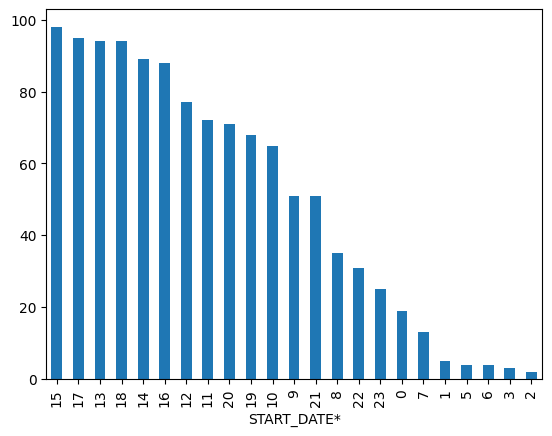

In [134]:
hrs.plot(kind='bar')

<Axes: xlabel='PURPOSE*'>

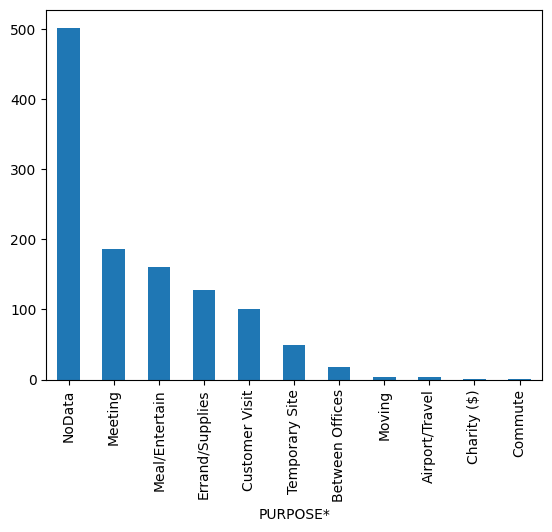

In [135]:
#Check The Purpose Of Trips
data['PURPOSE*'].value_counts().plot(kind='bar')

In [136]:
## Which Day Has The Highest Number Of mettingss
data['Day'] = data['START_DATE*'].dt.day_name()
data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NoData,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,Saturday
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,Saturday
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,Saturday


In [137]:
data[data['PURPOSE*'] == 'Meeting']['Day'].value_counts()
## Fridayy has highest number of meetingggsss

Day
Friday       59
Sunday       25
Tuesday      23
Thursday     23
Wednesday    22
Saturday     22
Monday       12
Name: count, dtype: int64

In [138]:
## Which Day Has The Highest Number Of Trips
data['Day'].value_counts()

Day
Friday       206
Tuesday      175
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: count, dtype: int64

In [139]:
##What Are The Number Of Trips Per Each Day?
data['Day_number'] = data['START_DATE*'].dt.day
data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Day,Day_number
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NoData,Saturday,2
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,2
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,5
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,6
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,Saturday,31
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,Saturday,31
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,Saturday,31
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,Saturday,31


<Axes: xlabel='Day_number'>

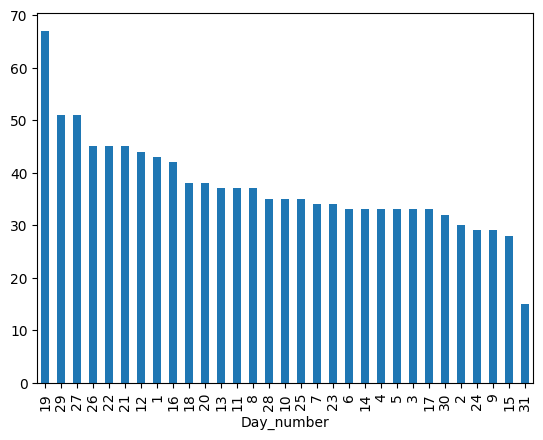

In [140]:
data['Day_number'].value_counts().plot(kind='bar')

In [141]:
data[data['Day_number'] == 19]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Day,Day_number
32,2016-01-19 09:09:00,2016-01-19 09:23:00,Business,Whitebridge,Lake Wellingborough,7.2,NoData,Tuesday,19
33,2016-01-19 10:55:00,2016-01-19 11:09:00,Business,Lake Wellingborough,Whitebridge,7.6,Temporary Site,Tuesday,19
126,2016-02-19 09:02:00,2016-02-19 09:14:00,Business,Unknown Location,Unknown Location,18.3,Meeting,Friday,19
127,2016-02-19 09:21:00,2016-02-19 09:51:00,Business,Unknown Location,Unknown Location,11.2,Meeting,Friday,19
128,2016-02-19 10:21:00,2016-02-19 10:48:00,Business,Unknown Location,Islamabad,7.6,Meeting,Friday,19
...,...,...,...,...,...,...,...,...,...
1066,2016-12-19 14:37:00,2016-12-19 14:50:00,Business,Unknown Location,Unknown Location,5.4,NoData,Monday,19
1067,2016-12-19 15:09:00,2016-12-19 15:38:00,Business,Unknown Location,Rawalpindi,10.2,Customer Visit,Monday,19
1068,2016-12-19 16:50:00,2016-12-19 17:09:00,Business,Rawalpindi,Islamabad,7.2,Customer Visit,Monday,19
1069,2016-12-19 19:05:00,2016-12-19 19:17:00,Business,Islamabad,Unknown Location,2.2,NoData,Monday,19


In [142]:
#What Are The Trips In The Month
data['Month'] = data['START_DATE*'].dt.month_name()
data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Day,Day_number,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,1,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NoData,Saturday,2,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,2,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,5,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,6,January
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,Saturday,31,December
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,Saturday,31,December
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,Saturday,31,December
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,Saturday,31,December


<Axes: xlabel='Month'>

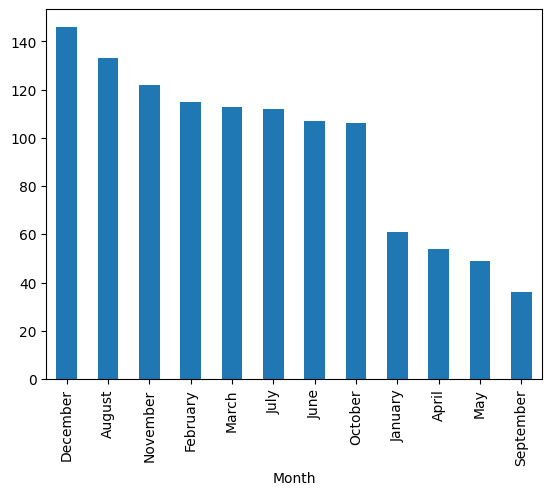

In [144]:
data['Month'].value_counts().plot(kind='bar')

<Axes: xlabel='START*'>

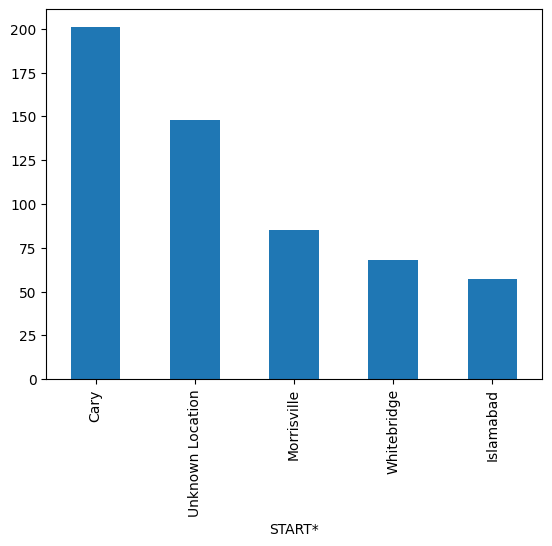

In [150]:
#The starting points of trips. Where Do People Start Boarding Their Trip From Most?
data['START*'].value_counts().head(5).plot(kind='bar')